# Hypothesis Question 2
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

### Steps to follow:
1. Define H0 and H1 in the question.
2. Do normality and variance test. 
3. Incase if data is not normal and not in same variance, proceed to a outliner removal and check again.
4. Use one way anova test to determine if there is a difference in the average. 
5. Define the result based on the p-value.

### Hypothesis Definition
H0 : There is no difference in the averages of different laboratories. i.e. All means are same. 

H1 : There is difference in atleast one of the averages of different laboratories. i.e Atleast one of mean is different. 

In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab
from scipy.stats import norm
import scipy.stats as ss

In [2]:
Q2= pd.read_csv('C:\\Users\\Vignesh R Babu\\Documents\\ExcelRPython\\Assignment Codes\\3\\LabTAT.csv')
Q2.rename(columns = {'Laboratory 1' : 'lab1', 'Laboratory 2' : 'lab2', 'Laboratory 3': 'lab3','Laboratory 4': 'lab4' }, inplace = True)
Q2

,lab1,lab2,lab3,lab4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


### Normality Test

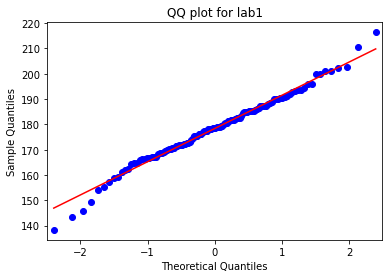

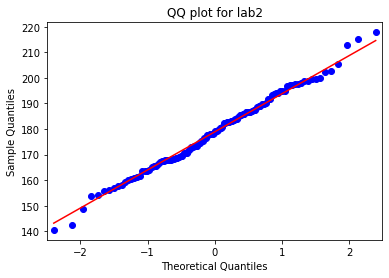

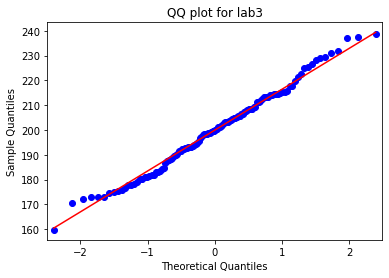

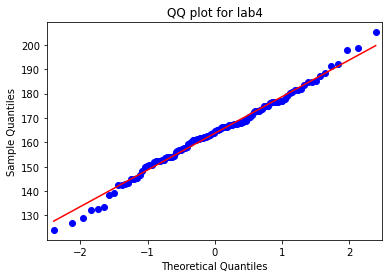

In [3]:
sm.qqplot(Q2.lab1, line = 's')
pylab.title('QQ plot for lab1')

sm.qqplot(Q2.lab2, line = 's')
pylab.title('QQ plot for lab2')

sm.qqplot(Q2.lab3, line = 's')
pylab.title('QQ plot for lab3')

sm.qqplot(Q2.lab4, line = 's')
pylab.title('QQ plot for lab4')
pylab.show() #All distributions are almost normal as per QQ plot

 ### Variance Test - Use Bartlett's test for homogeneity of variances
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html#:~:text=Perform%20Bartlett's%20test%20for%20equal,test%20levene%20is%20more%20robust.


In [4]:
ss.bartlett(Q2.lab1,Q2.lab2,Q2.lab3,Q2.lab4) #p-value > 0.05. Therefore, Variances can be assumed to be same. 

BartlettResult(statistic=6.099521405922483, pvalue=0.10686741658107135)

### One way ANOVA test:

The statistic this test returns is equvalent to the variation in variance between inner groups. 
p-value is the only thing we are concerned about.

In [5]:
ss.f_oneway(Q2.lab1,Q2.lab2,Q2.lab3,Q2.lab4) #p-value <<< 0.05

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

### Result

p-value is much smaller than alpha(0.05). This implies that we have to reject the null hypothesis. 
Therefore, we can conclude statistically that there is difference in atleast one of the averages of different laboratories. i.e Atleast one of mean is different.

### Additional:

ANOVA is an omnibus test. It does not tell us which mean is different.In order to find which mean deviates from the rest of the means, we can use the TukeyHSD Test.

To do the tukeyHSD test, we need to change our dataset slightly to accomodate for the tukshey test.

https://www.statology.org/tukey-test-python/#:~:text=One%20of%20the%20most%20commonly,perform%20Tukey's%20Test%20in%20Python.

In [6]:
import numpy as np
df = pd.DataFrame({'score': Q2.lab1.append(Q2.lab2).append(Q2.lab3).append(Q2.lab4).reset_index(drop=True),'group': np.repeat(['lab1', 'lab2', 'lab3','lab4'], repeats=120)}) 
df

,score,group
0,185.35,lab1
1,170.49,lab1
2,192.77,lab1
3,177.33,lab1
4,193.41,lab1
...,...,...
475,172.68,lab4
476,177.64,lab4
477,170.27,lab4
478,150.87,lab4


In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  lab1   lab2   0.5413   0.9  -4.4468   5.5294  False
  lab1   lab3  21.5517 0.001  16.5636  26.5398   True
  lab1   lab4 -14.6788 0.001 -19.6669  -9.6907   True
  lab2   lab3  21.0103 0.001  16.0222  25.9984   True
  lab2   lab4 -15.2202 0.001 -20.2083 -10.2321   True
  lab3   lab4 -36.2305 0.001 -41.2186 -31.2424   True
-----------------------------------------------------


### Tukey Result:

Thus, we would conclude that there is a statistically significant difference between the means of labs:(lab1&lab3,lab1&lab4,lab2&lab3,lab2&lab4,lab3&lab4), but not a statistically significant difference between the means of labs lab1 and lab2.